# 随机数的曲线拟合-LASSO回归解法

LASSO回归：1阶，alpha=0.568987，系数为： [-14.19090661   4.38722872]
LASSO回归：2阶，alpha=0.355648，系数为： [-0.         -4.74341977  1.05169807]
LASSO回归：3阶，alpha=0.001265，系数为： [-5.70971683 -1.25473022  0.39802875  0.03864026]
LASSO回归：4阶，alpha=0.054287，系数为：

 [-4.7823603  -1.78289622  0.45590585  0.04560841 -0.00100266]
LASSO回归：5阶，alpha=0.016768，系数为： [-4.65874933 -1.89173567  0.43284369  0.04776217  0.00158691 -0.00029914]


LASSO回归：6阶，alpha=0.006551，系数为： [-4.78816005 -1.66602758  0.35332146  0.04591765  0.00294117 -0.00001043 -0.00004147]


LASSO回归：7阶，alpha=0.138950，系数为： [-3.0620551  -2.21851093  0.2945814   0.06416419  0.00254199  0.0000359  -0.00001812 -0.00000436]


LASSO回归：8阶，alpha=0.222300，系数为： [-2.23881622 -2.39962137  0.2406176   0.07587953  0.00205484  0.00001921 -0.00000965 -0.00000222 -0.00000037]


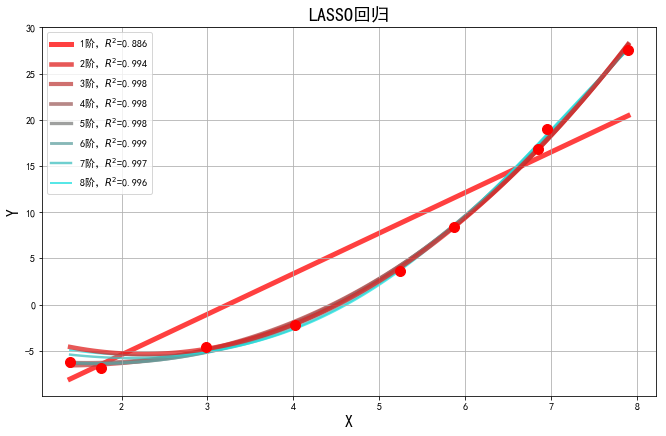

In [5]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import matplotlib as mpl
import warnings

def xss(y, y_hat):
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    # print 'RSS:', rss, '\t ESS:', ess
    # print 'TSS:', tss, 'RSS + ESS = ', rss + ess
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    # Version 2
    # tss = np.var(y)
    # rss = np.average((y_hat - y) ** 2)
    # r2 = 1 - rss / tss
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)

x.shape = -1, 1
y.shape = -1, 1

model = Pipeline([('poly', PolynomialFeatures()),
                  ('linear', LassoCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))])
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

plt.figure(figsize=(18, 12), facecolor='w')
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, N):
    clrs.append("#{:06X}".format(int(c), 2))
line_width = np.linspace(5, 2, m)
titles =  u'LASSO回归'
tss_list = []
rss_list = []
ess_list = []
ess_rss_list = []
plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=10, zorder=N)
for i, d in enumerate(d_pool):
    model.set_params(poly__degree=d)
    model.fit(x, y.ravel())
    lin = model.get_params('linear')['linear']
    output = u'%s：%d阶，系数为：' % (titles, d)
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f，' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):   # 根据交叉验证结果，从输入l1_ratio(list)中选择的最优l1_ratio_(float)
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f，' % lin.l1_ratio_) + output[idx:]
    print(output, lin.coef_.ravel())
    x_hat = np.linspace(x.min(), x.max(), num=100)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    r2, corr_coef = xss(y, model.predict(x))
    # print 'R2和相关系数：', r2, corr_coef
    # print 'R2：', s, '\n'
    z = N - 1 if (d == 2) else 0
    label = u'%d阶，$R^2$=%.3f' % (d, s)
    if hasattr(lin, 'l1_ratio_'):
        label += u'，L1 ratio=%.2f' % lin.l1_ratio_
    plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, label=label, zorder=z)
plt.legend(loc='upper left')
plt.grid(True)
plt.title(titles, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()